# Analysis of Coronavirus Pandemic

In [14]:
require(scales)
library(reshape2)
library(ggplot2)
library(dplyr)

## Load data

In [15]:

df <- read.csv("../data/owid-covid-data.csv")

## Filter data

In [16]:

locations = c("United States", "India", "Brazil", "Australia", "United Kingdom", "Italy", "South Africa", "Afghanistan", "Singapore")
df <- df[df$location %in% locations, ]
df$total_cases <- as.numeric(df$total_cases)
df$week_number <- strftime(df$date, "%V")
df$month <- strftime(df$date, "%B")



# Reserach question 1

In [17]:
df_cases = df %>%
  select(location, total_cases, population, population_density)
df_cases <- na.omit(df_cases)

df_total <- df_cases %>% 
  group_by(location) %>% 
  summarise(total_cases = max(total_cases), population = max(population), population_density=max(population_density))

## Welch two sample t-test
t.test(df_total$population, df_total$total_cases,
       alternative = c("two.sided", "less", "greater"),
       mu = 0, paired = FALSE, var.equal = FALSE,
       conf.level = 0.95)


	Welch Two Sample t-test

data:  df_total$population and df_total$total_cases
t = 1.6265, df = 8.0026, p-value = 0.1425
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -99509796 575965976
sample estimates:
mean of x mean of y 
242389059   4160968 


# Reserach question 2

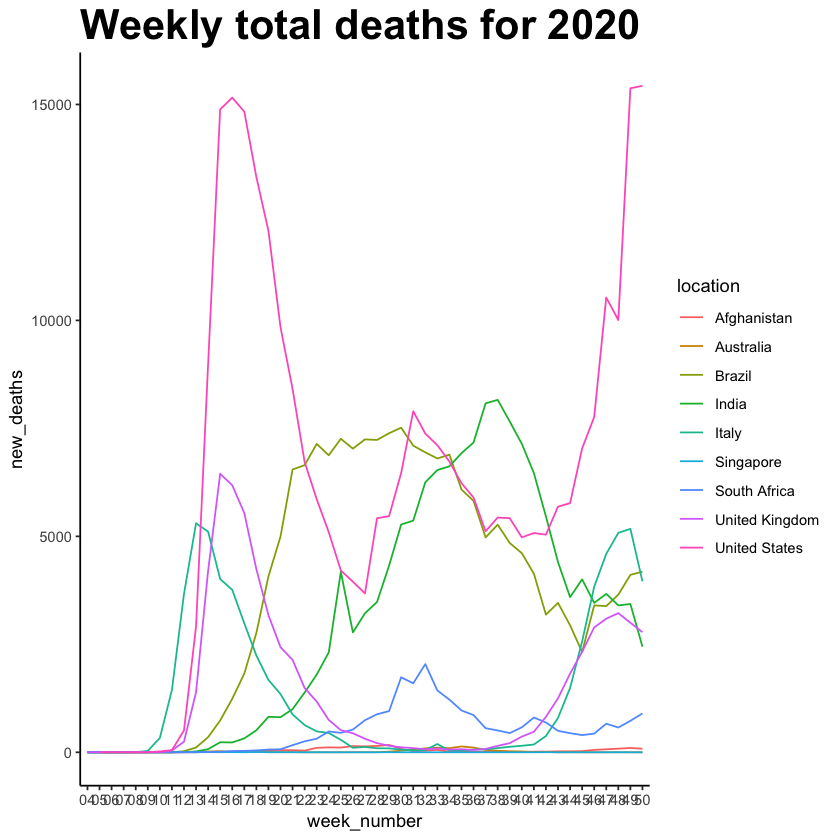

In [18]:
df_new_deaths <- df %>% 
  group_by(location, week_number) %>% 
  summarise(new_deaths = sum(new_deaths))

df_avg_test <- na.omit(df_new_deaths)

plot <- ggplot(df_avg_test, aes(x=week_number, y=new_deaths, group=location)) +
  geom_line(aes(color=location))
plot +
  theme_classic() +
  ggtitle("Weekly total deaths for 2020") + 
  theme(plot.title = element_text(size = 25, face = "bold"))


Warning message:
“Removed 25 rows containing missing values (geom_path).”

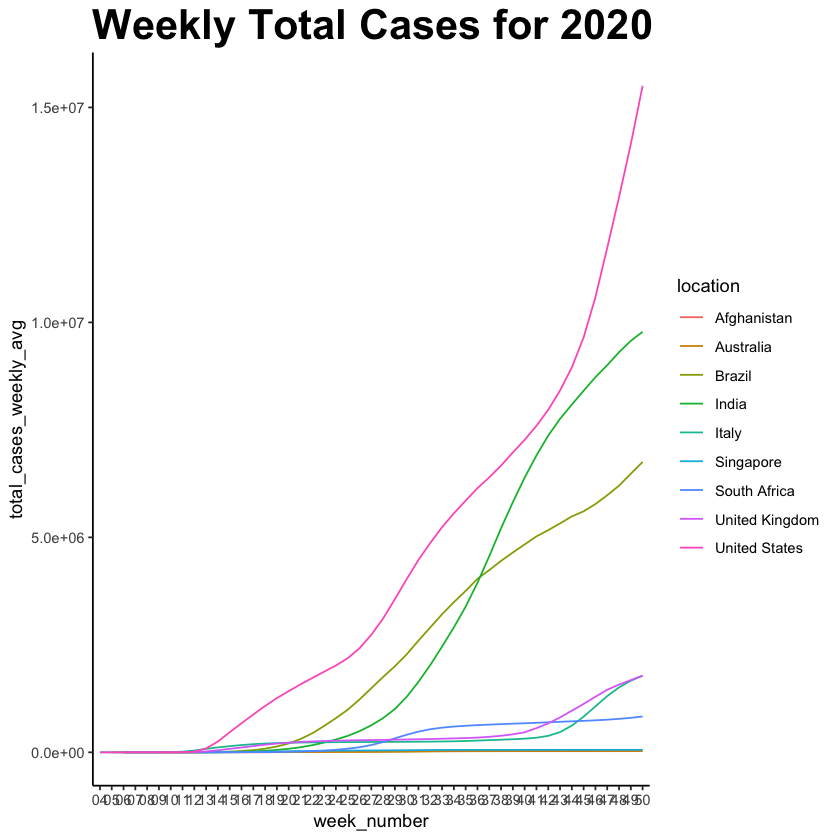

In [19]:
df_avg <- df %>% 
  group_by(location, week_number) %>% 
  summarise(total_cases_weekly_avg = mean(total_cases))

plot <- ggplot(df_avg, aes(x=week_number, y=total_cases_weekly_avg, group=location)) +
  geom_line(aes(color=location))
plot +
  theme_classic() +
  ggtitle("Weekly Total Cases for 2020") + 
  theme(plot.title = element_text(size = 25, face = "bold"))